Import necessary libraries

In [1]:
import numpy as np
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Input, Lambda
from tensorflow.keras.models import Sequential
import matplotlib.pyplot as plt
import keras.backend as K

Set random seed for reproducibility

In [2]:
np.random.seed(42)
tf.random.set_seed(42)

STEP 1: DEFINE ACTIVATION FUNCTIONS

In [3]:
def linear(x):
    """ Linear Activation: f(x) = x """
    return x

def sigmoid(x):
    """ Sigmoid Activation: f(x) = 1 / (1 + exp(-x)) """
    return 1 / (1 + np.exp(-x))

def tanh(x):
    """ Tanh Activation: f(x) = (exp(x) - exp(-x)) / (exp(x) + exp(-x)) """
    return np.tanh(x)

def relu(x):
    """ ReLU Activation: f(x) = max(0, x) """
    return np.maximum(0, x)

def leaky_relu(x, alpha=0.01):
    """ Leaky ReLU Activation: f(x) = x if x > 0, else alpha * x """
    return np.where(x > 0, x, alpha * x)

def elu(x, alpha=1.0):
    """ Exponential Linear Unit (ELU): f(x) = x if x > 0, else alpha * (exp(x) - 1) """
    return np.where(x > 0, x, alpha * (np.exp(x) - 1))

def maxout(x):
    """ Maxout Activation: Selects the maximum from multiple neurons.
        Since maxout requires multiple neurons, we simulate by taking max between x and 0.5x """
    return np.maximum(x, 0.5 * x)

STEP 2: PLOT ACTIVATION FUNCTIONS

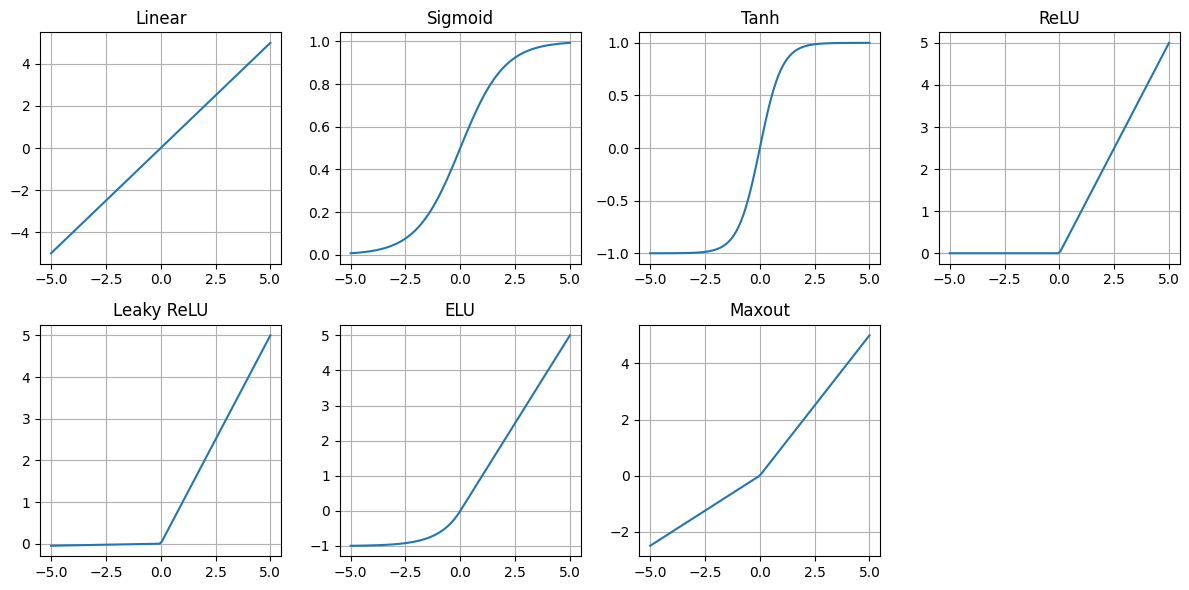

In [4]:
x = np.linspace(-5, 5, 100)

activations = {
    "Linear": linear(x),
    "Sigmoid": sigmoid(x),
    "Tanh": tanh(x),
    "ReLU": relu(x),
    "Leaky ReLU": leaky_relu(x),
    "ELU": elu(x),
    "Maxout": maxout(x),
}

plt.figure(figsize=(12, 6))

for i, (name, y) in enumerate(activations.items()):
    plt.subplot(2, 4, i+1)
    plt.plot(x, y)
    plt.title(name)
    plt.grid(True)

plt.tight_layout()
plt.show()

STEP 3: TRAIN NEURAL NETWORK WITH DIFFERENT ACTIVATIONS

In [5]:
# Generate synthetic dataset (1000 samples, 10 features)
X_train = np.random.rand(1000, 10)
Y_train = (np.sum(X_train, axis=1) > 5).astype(int)  # Binary classification

# Split into train and validation sets
X_train_split, X_val_split = X_train[:800], X_train[800:]
Y_train_split, Y_val_split = Y_train[:800], Y_train[800:]

# List of activation functions
activation_functions = ["linear", "sigmoid", "tanh", "relu", "leaky_relu", "elu"]

# Dictionary to store training histories
histories = {}

for activation in activation_functions:
    print(f"\nTraining model with {activation} activation...")

    # Define model
    model = Sequential([
        Dense(16, activation=activation, input_shape=(10,)),
        Dense(8, activation=activation),
        Dense(1, activation='sigmoid')  # Output layer for binary classification
    ])

    # Compile model
    model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

    # Train model
    history = model.fit(X_train_split, Y_train_split, epochs=30, batch_size=32,
                        validation_data=(X_val_split, Y_val_split), verbose=0)

    # Store history
    histories[activation] = history


Training model with linear activation...


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)



Training model with sigmoid activation...

Training model with tanh activation...

Training model with relu activation...

Training model with leaky_relu activation...

Training model with elu activation...


STEP 4: VISUALIZE TRAINING RESULTS

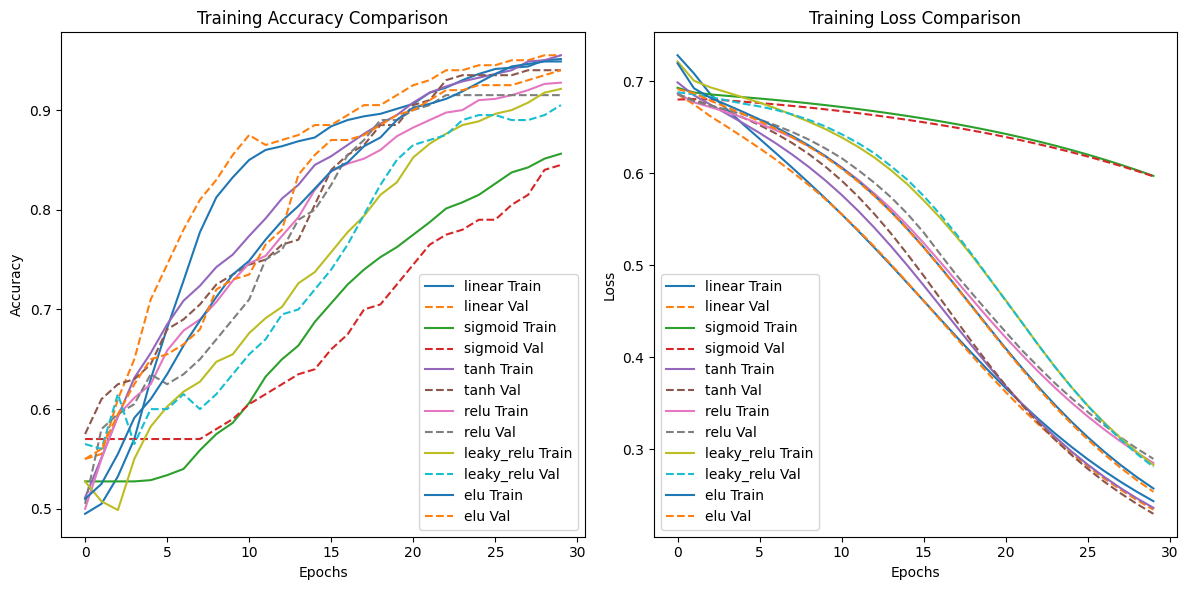

In [6]:
plt.figure(figsize=(12, 6))

# Plot accuracy curves
plt.subplot(1, 2, 1)
for activation, history in histories.items():
    plt.plot(history.history['accuracy'], label=f'{activation} Train')
    plt.plot(history.history['val_accuracy'], linestyle='dashed', label=f'{activation} Val')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.title('Training Accuracy Comparison')
plt.legend()

# Plot loss curves
plt.subplot(1, 2, 2)
for activation, history in histories.items():
    plt.plot(history.history['loss'], label=f'{activation} Train')
    plt.plot(history.history['val_loss'], linestyle='dashed', label=f'{activation} Val')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.title('Training Loss Comparison')
plt.legend()

plt.tight_layout()
plt.show()

STEP 5: ADVANTAGES & LIMITATIONS OF ACTIVATIONS



  Summary of Activation Functions:

  1. **Linear**:
    - Advantage: Simple, works well for regression.
    - Limitation: Cannot introduce non-linearity, making deep networks useless.

  2. **Sigmoid (Logistic)**:
    - Advantage: Good for probability estimation (outputs between 0 and 1).
    - Limitation: Causes vanishing gradient problem in deep networks.

  3. **Tanh**:
    - Advantage: Zero-centered outputs (-1 to 1) improve optimization.
    - Limitation: Still suffers from vanishing gradient.

  4. **ReLU (Rectified Linear Unit)**:
    - Advantage: Simple, avoids vanishing gradient for positive inputs.
    - Limitation: Dead neurons (neurons can stop learning for negative inputs).

  5. **Leaky ReLU**:
    - Advantage: Fixes the "dying ReLU" problem by allowing small negative gradients.
    - Limitation: Adds an extra hyperparameter (alpha).

  6. **ELU (Exponential Linear Unit)**:
    - Advantage: Smooth gradient, improves training speed.
    - Limitation: More computationally expensive than ReLU.

  7. **Maxout**:
    - Advantage: Generalizes ReLU and can learn the best activation.
    - Limitation: Requires more parameters, increasing complexity.

  Observations from Training:
  - **ReLU and Leaky ReLU** tend to perform well in deeper networks.
  - **Sigmoid and Tanh** may struggle due to vanishing gradients.
  - **ELU** often improves training speed and stability.
  - **Maxout** is powerful but computationally expensive.

  Conclusion:

  Choosing the right activation function depends on the task and network depth!
